<h1><center>Introduction to Computing</center></h1>

## <center>Insights from Customer Segmentation and Recommendation Systems </center>

### Part I: Importing libraries

### Part II: Data Collection
    Subpart I:Getting Data via Web Scrapping
    
###  Part III: Data Processing
    Subpart I: Developing a python dataframe for use as database
    Subpart II: Use of SQL commands for manipulation, aggregation and priliminary analysis of data
    Subpart III: Use of Object Oriented Programming Concepts (OOPS) for building Class Invoice for printing details of invoice and shipping details
    
### Part VI: Data Analysis via Predictive Analytics Models
    Subpart I: RFM Analysis on Sales Data
    Subpart II: Customer Segmentation using K-Means Clustering
    Subpart III: Popularity based recommendation system
    Subpart IV: Collaborative Filtering based recommendation system    
    Subpart V: Content(Product Description) based recommendation system
    
### Part V: Visualizations and Conclusion




#### Submitted by 
Group 1: 
Priyanka Dalmia |
Radha Krishnan |
Robin Raj |
Samarth Gubrele |
Shubankur Biswas

---
### Part I: Importing libraries

In [1]:
#Importing required libraries 
import requests
import pandas as pd
from dateutil import parser
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandasql as ps
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

---
### Part II: Data Collection

In [2]:
#Scraping data from the web
data1 = requests.get("https://raw.githubusercontent.com/apollo-robin/superstore_retail_sales/main/superstore_dataset_1.json")
data2 = requests.get("https://raw.githubusercontent.com/apollo-robin/superstore_retail_sales/main/superstore_dataset_2.json")
retail_data1 = data1.json()
retail_data2 = data2.json()
retail_data = retail_data1 + retail_data2

In [3]:
#Converting the json file to DataFrame 
retail_df = pd.DataFrame(retail_data)
retail_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,rating,Product Description
0,39652,CA-2014-132199,04-05-2014,09-05-2014,Standard Class,BO-11350,Bill Overfelt,Corporate,Philadelphia,Pennsylvania,...,Fasteners,Advantus Plastic Paper Clips,8.00,2,0.2,2.800,0.23,Medium,0,Home Styles Create-a-Cart in a Cottage Oak fin...
1,20803,IN-2014-33666,04-06-2014,08-06-2014,Standard Class,KD-16495,Keith Dawkins,Corporate,Ipoh,Perak,...,Phones,"Nokia Audio Dock, Cordless",1356.72,8,0.0,433.920,134.33,Medium,2,This Dragonfly Bridge Floor Lamp has been hand...
2,15578,ES-2014-1282315,04-06-2014,07-06-2014,First Class,BW-11110,Bart Watters,Corporate,Bradford,England,...,Phones,"Samsung Signal Booster, Full Size",413.64,3,0.0,198.540,119.06,High,4,Scalloped edging adds a classic look to any fl...
3,17948,ES-2014-1472055,04-06-2014,04-06-2014,Same Day,EL-13735,Ed Ludwig,Home Office,Murcia,Murcia,...,Appliances,"Cuisinart Stove, White",536.43,1,0.0,91.170,104.69,High,4,Fypon pilasters add the enticing appeal of cla...
4,37222,CA-2014-150420,04-06-2014,09-06-2014,Standard Class,GD-14590,Giulietta Dortch,Corporate,Bellingham,Washington,...,Accessories,Plantronics Audio 995 Wireless Stereo Headset,1099.50,10,0.0,362.835,98.09,Medium,2,The RIDGID 4-1/2 in. Angle Grinder has a durab...


In [4]:
#Converitng order date and ship date to datetime type
order_date = [0]*(len(retail_df['Order Date']))
ship_date = [0]*(len(retail_df['Order Date']))

for i in range(len(retail_df['Order Date'])):
    order_date[i] = parser.parse(retail_df['Order Date'].iloc[i])
    ship_date[i] = parser.parse(retail_df['Ship Date'].iloc[i])
    
retail_df['Order Date'] = order_date
retail_df['Ship Date'] = ship_date
retail_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,rating,Product Description
0,39652,CA-2014-132199,2014-04-05,2014-09-05,Standard Class,BO-11350,Bill Overfelt,Corporate,Philadelphia,Pennsylvania,...,Fasteners,Advantus Plastic Paper Clips,8.00,2,0.2,2.800,0.23,Medium,0,Home Styles Create-a-Cart in a Cottage Oak fin...
1,20803,IN-2014-33666,2014-04-06,2014-08-06,Standard Class,KD-16495,Keith Dawkins,Corporate,Ipoh,Perak,...,Phones,"Nokia Audio Dock, Cordless",1356.72,8,0.0,433.920,134.33,Medium,2,This Dragonfly Bridge Floor Lamp has been hand...
2,15578,ES-2014-1282315,2014-04-06,2014-07-06,First Class,BW-11110,Bart Watters,Corporate,Bradford,England,...,Phones,"Samsung Signal Booster, Full Size",413.64,3,0.0,198.540,119.06,High,4,Scalloped edging adds a classic look to any fl...
3,17948,ES-2014-1472055,2014-04-06,2014-04-06,Same Day,EL-13735,Ed Ludwig,Home Office,Murcia,Murcia,...,Appliances,"Cuisinart Stove, White",536.43,1,0.0,91.170,104.69,High,4,Fypon pilasters add the enticing appeal of cla...
4,37222,CA-2014-150420,2014-04-06,2014-09-06,Standard Class,GD-14590,Giulietta Dortch,Corporate,Bellingham,Washington,...,Accessories,Plantronics Audio 995 Wireless Stereo Headset,1099.50,10,0.0,362.835,98.09,Medium,2,The RIDGID 4-1/2 in. Angle Grinder has a durab...


In [5]:
#Dataframes for SQL
df = retail_df.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_sql = df

***
###  Part III: Data Wrangling

#### OOPS 

In [6]:
#Creating a class to store Order Details
class Orders():
    def __init__(self,invoice):
        self.InvoiceID = invoice['Order ID']
        self.OrderDate = invoice['Order Date']
        self.CustomerID = invoice['Customer ID']
        self.CustomerName = invoice['Customer Name']
        #Encapsulating data to restrict from being changed 
        self.__OrderID = invoice['Order ID']
        self.__ShippingDate = invoice['Ship Date']
        self.__ShippingMode = invoice['Ship Mode']
        self.__Segment = invoice['Segment']
        self.__City = invoice['City']
        self.__State = invoice['State']
        self.__Country = invoice['Country']
        self.__ProductID = invoice['Product ID']
        self.__Category = invoice['Category']
        self.__SubCategory = invoice['Sub-Category']
        self.__ProductName = invoice['Product Name']
        self.__Sales = invoice['Sales']
        self.__Quantity = invoice['Quantity']
        self.__Discount = invoice['Discount']
        self.__Profit = invoice['Profit']   
        self.__ShippingCost = invoice['Shipping Cost']
        self.__OrderPriority = invoice['Order Priority']

#Method to print order details
    def PrintOrderDetails(self):
        print("Order Details:-\n\nOrder Number:\t" + self.__OrderID +"\nDate:\t\t" + self.OrderDate + 
              "\nCustomer Name:\t"+ self.CustomerName  + "\nCustomer ID:\t" + self.CustomerID + "\nProduct Name:\t"+ 
              self.__ProductName + "\nProduct ID:\t"+ self.__ProductID + "\nQuantity:\t" + str(self.__Quantity) + 
              "\nDiscount:\t" + str(self.__Discount)+"\nPrice:\t\t" + str(self.__Sales))

#Method to print shipping details of an order 
    def ShippingDetails(self):
        print("Shipping Details:-\n\nOrder Number:\t" + self.__OrderID +"\nDate:\t\t" + self.OrderDate + "\nCustomer Name:\t"+ self.CustomerName +
              "\nShipping Date:\t" + self.__ShippingDate + "\nShipping Mode:\t" + self.__ShippingMode + 
               "\nAddress:\t"+ self.__City + ", " + self.__State + ", " + self.__Country + 
              "\nShipping Cost:\t" + str(self.__ShippingCost) + "\nPriority:\t" + self.__OrderPriority)

#Method to return the product details        
    def GetItems(self):
        return [self.__ProductName,self.__ProductID, self.__Quantity, self.__Discount, self.__Sales]

In [7]:
#Printing Order Details
Orders(retail_data[0]).PrintOrderDetails()

Order Details:-

Order Number:	CA-2014-132199
Date:		04-05-2014
Customer Name:	Bill Overfelt
Customer ID:	BO-11350
Product Name:	Advantus Plastic Paper Clips
Product ID:	OFF-FA-10002280
Quantity:	2
Discount:	0.2
Price:		8


In [8]:
#Printing Shipping Details
Orders(retail_data[0]).ShippingDetails()

Shipping Details:-

Order Number:	CA-2014-132199
Date:		04-05-2014
Customer Name:	Bill Overfelt
Shipping Date:	09-05-2014
Shipping Mode:	Standard Class
Address:	Philadelphia, Pennsylvania, United States
Shipping Cost:	0.23
Priority:	Medium


In [9]:
#List of all orders using "Orders" class
all_orders = [Orders(x) for x in retail_data]

In [10]:
#Child Class of Orders 
#Inherits variables and methods from the order class to generate invoice of all items of an order 

class Invoice(Orders):
    def __init__ (self,invoice):
        super().__init__(invoice)
    
    def GenerateInvoice(self):
        print("Generating Invoice for: " +self.InvoiceID+"\n")
        print("\nDate:\t\t" + self.OrderDate + "\nCustomer Name:\t"+ self.CustomerName  + "\nCustomer ID:\t" + 
                      self.CustomerID, "\nItem Lists:")
        ItemList = pd.DataFrame(columns=['ProductName','ProductID','Quantity','Discount','Price'])
        for order in all_orders:
            if order.InvoiceID == self.InvoiceID:
                item = order.GetItems()
                a_series = pd.Series(item, index = ItemList.columns)
                ItemList = ItemList.append(a_series, ignore_index=True)
        return(ItemList)

In [11]:
#Generating Invoice 
Invoice(retail_data[4]).GenerateInvoice()

Generating Invoice for: CA-2014-150420


Date:		04-06-2014
Customer Name:	Giulietta Dortch
Customer ID:	GD-14590 
Item Lists:


,ProductName,ProductID,Quantity,Discount,Price
0,Plantronics Audio 995 Wireless Stereo Headset,TEC-AC-10004975,10,0,1099.5


#### SQL

In [12]:
ps.sqldf("SELECT COUNT(customer_id), state FROM df_sql GROUP BY city")

,COUNT(customer_id),state
0,13,North Rhine-Westphalia
1,1,Baden-Württemberg
2,11,Abia
3,4,Khuzestan
4,2,Ogun
...,...,...
3098,20,Zürich
3099,1,Grand Gedeh
3100,2,Saxony
3101,1,Overijssel


In [13]:
ps.sqldf("SELECT * FROM df_sql")

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,rating,product_description
0,39652,CA-2014-132199,2014-04-05 00:00:00.000000,2014-09-05 00:00:00.000000,Standard Class,BO-11350,Bill Overfelt,Corporate,Philadelphia,Pennsylvania,...,Fasteners,Advantus Plastic Paper Clips,8.000,2,0.2,2.8000,0.23,Medium,0,Home Styles Create-a-Cart in a Cottage Oak fin...
1,20803,IN-2014-33666,2014-04-06 00:00:00.000000,2014-08-06 00:00:00.000000,Standard Class,KD-16495,Keith Dawkins,Corporate,Ipoh,Perak,...,Phones,"Nokia Audio Dock, Cordless",1356.720,8,0.0,433.9200,134.33,Medium,2,This Dragonfly Bridge Floor Lamp has been hand...
2,15578,ES-2014-1282315,2014-04-06 00:00:00.000000,2014-07-06 00:00:00.000000,First Class,BW-11110,Bart Watters,Corporate,Bradford,England,...,Phones,"Samsung Signal Booster, Full Size",413.640,3,0.0,198.5400,119.06,High,4,Scalloped edging adds a classic look to any fl...
3,17948,ES-2014-1472055,2014-04-06 00:00:00.000000,2014-04-06 00:00:00.000000,Same Day,EL-13735,Ed Ludwig,Home Office,Murcia,Murcia,...,Appliances,"Cuisinart Stove, White",536.430,1,0.0,91.1700,104.69,High,4,Fypon pilasters add the enticing appeal of cla...
4,37222,CA-2014-150420,2014-04-06 00:00:00.000000,2014-09-06 00:00:00.000000,Standard Class,GD-14590,Giulietta Dortch,Corporate,Bellingham,Washington,...,Accessories,Plantronics Audio 995 Wireless Stereo Headset,1099.500,10,0.0,362.8350,98.09,Medium,2,The RIDGID 4-1/2 in. Angle Grinder has a durab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30265,39649,CA-2014-132199,2014-04-05 00:00:00.000000,2014-09-05 00:00:00.000000,Standard Class,BO-11350,Bill Overfelt,Corporate,Philadelphia,Pennsylvania,...,Binders,Wilson Jones Legal Size Ring Binders,26.388,4,0.7,-17.5920,2.97,Medium,5,Z-Flex Stainless Steel Chimney Liner Kits come...
30266,43977,SF-2014-1390,2014-04-05 00:00:00.000000,2014-06-05 00:00:00.000000,Second Class,AH-465,Amy Hunt,Consumer,Stellenbosch,Western Cape,...,Labels,"Novimex Round Labels, Alphabetical",12.180,2,0.0,5.2200,2.50,High,4,"Grow your own herbs, vegetables, flowers, and ..."
30267,38905,CA-2014-163209,2014-04-05 00:00:00.000000,2014-08-05 00:00:00.000000,Standard Class,MK-18160,Mike Kennedy,Consumer,San Francisco,California,...,Paper,Xerox 2,25.920,4,0.0,12.4416,1.57,Medium,4,The Grip-Rite 1-5/8 in. Steel Bright Ring Dryw...
30268,39648,CA-2014-132199,2014-04-05 00:00:00.000000,2014-09-05 00:00:00.000000,Standard Class,BO-11350,Bill Overfelt,Corporate,Philadelphia,Pennsylvania,...,Furnishings,"Career Cubicle Clock, 8 1/4"", Black",32.448,2,0.2,7.3008,1.54,Medium,0,Builders Edge paintable head metal screws prov...


In [14]:
ps.sqldf("DELETE FROM df_sql WHERE customer_name='Toby Braunhardt'")

---
### Part IV: Data Analysis via Predictive Analytics Models

### RFM Score + K-Means Clustering

##### Recency: When was the last purchase 
##### Frequency: No. of orders 
##### Monetary: Sum of profit

In [15]:
#Creating RFM Table for customers
last_date = max(retail_df['Order Date']) + datetime.timedelta(days=1)
RFM_table = retail_df.groupby(['Customer ID']).agg({'Order Date': lambda x: (last_date - x.max()).days,
                                                    'Order ID': 'count', 'Profit': 'sum'})
RFM_table.rename(columns = {'Order Date': 'Recency',
                            'Order ID': 'Frequency',
                            'Profit': 'Monetary'}, inplace=True)
RFM_table.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,1,25,-387.02490
AA-10375,7,26,1066.68450
AA-10480,105,28,735.13948
AA-10645,14,43,1105.96316
AA-315,227,4,409.23000


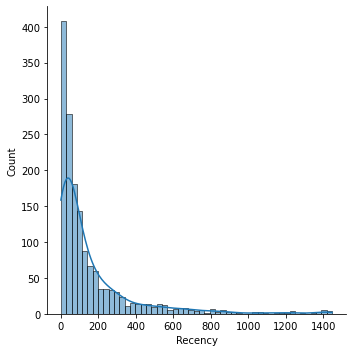

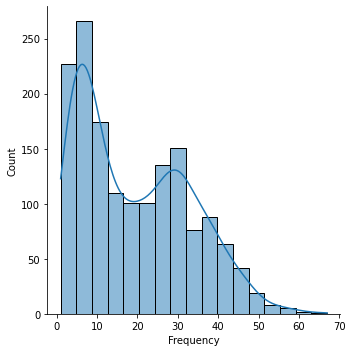

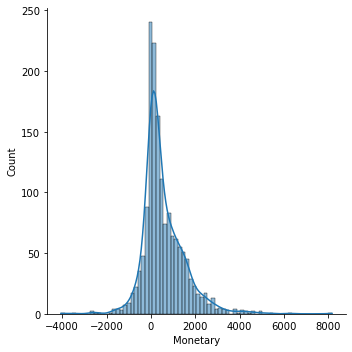

In [16]:
#Visualisations
sns.displot(RFM_table['Recency'], kde = True)
sns.displot(RFM_table['Frequency'], kde = True)
sns.displot(RFM_table['Monetary'], kde = True)

In [17]:
#RFM scoring

#Creating array of scores  1-3 for RFM 

count = int(len(RFM_table['Recency'])/3)

a1 = np.full((1,count),1)
a2 = np.full((1,count),2)
a3 = np.full((1,count),3)

score = np.hstack((a1,a2,a3)).flatten()

In [18]:
#Plugging in R score 
RFM_table = RFM_table.sort_values(by = 'Recency', ascending = False)
RFM_table['rScore'] = score

In [19]:
#Plugging in F score 
RFM_table = RFM_table.sort_values(by = 'Frequency')
RFM_table['fScore'] = score

In [20]:
#Plugging in M score 
RFM_table = RFM_table.sort_values(by = 'Monetary')
RFM_table['mScore'] = score

In [21]:
RFM_table

,Recency,Frequency,Monetary,rScore,fScore,mScore
Customer ID,,,,,,
GT-14635,47,22,-4061.15766,2,2,1
SN-20560,40,33,-3495.41580,2,3,1
SS-20140,3,26,-2692.43020,3,2,1
SR-20425,93,27,-2578.02390,2,3,1
HG-14965,64,28,-2548.28690,2,3,1
...,...,...,...,...,...,...
BS-11365,126,42,4894.08872,2,3,3
DR-12940,11,44,5022.06392,3,3,3
AB-10105,196,30,5364.69770,1,3,3


<AxesSubplot:>

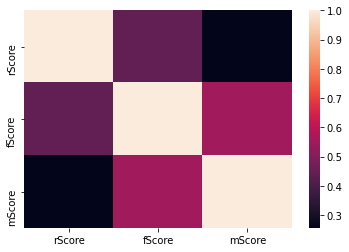

In [22]:
#Plotting the heatmap for correlation
sns.heatmap(RFM_table.iloc[:,3:].corr())

#### K-Means clustering 

Text(0, 0.5, 'WCSS')

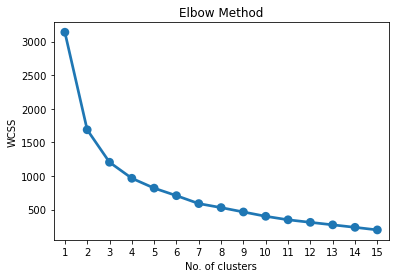

In [23]:
from sklearn.cluster import KMeans

WCSS = []
#Determining optimal value of K 
for i in range(1,16):
    wcss = KMeans(n_clusters = i, init='k-means++', random_state = 42).fit(RFM_table.iloc[:,3:])
    WCSS.append(wcss.inertia_)

sns.pointplot(x = list(range(1,16)), y = WCSS)
plt.title("Elbow Method")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

#### No. of optimal clusters (from graph) = 4

In [24]:
#Modelling 
model = KMeans(n_clusters = 4, init='k-means++', random_state = 42).fit(RFM_table.iloc[:,3:])
model.fit(RFM_table.iloc[:,3:])

KMeans(n_clusters=4, random_state=42)

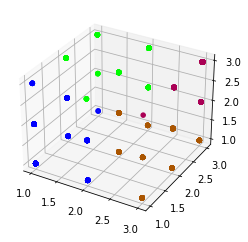

In [25]:
#Plotting the customers
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(RFM_table.iloc[:,3],RFM_table.iloc[:,4],RFM_table.iloc[:,5],cmap='brg',c = model.predict(RFM_table.iloc[:,3:]))

In [26]:
#Identifying the cluster for each customer 
RFM_table['Cluster'] = model.labels_

In [27]:
#Melting the data
RFM_melted = pd.melt(RFM_table.reset_index(), 
                     id_vars=['Customer ID','Cluster'], 
                     value_vars=['rScore','fScore','mScore'], 
                     var_name='Score', 
                     value_name='Rating')
RFM_melted

,Customer ID,Cluster,Score,Rating
0,GT-14635,2,rScore,2
1,SN-20560,2,rScore,2
2,SS-20140,2,rScore,3
3,SR-20425,2,rScore,2
4,HG-14965,2,rScore,2
...,...,...,...,...
4702,BS-11365,3,mScore,3
4703,DR-12940,1,mScore,3
4704,AB-10105,3,mScore,3
4705,HL-15040,1,mScore,3


<AxesSubplot:xlabel='Score', ylabel='Rating'>

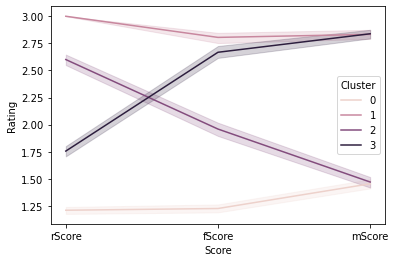

In [28]:
#Plotting
sns.lineplot(x='Score',y='Rating',data = RFM_melted, hue = "Cluster")

In [29]:
#Summary for the clusters

RFM_table.iloc[:,[0,1,2,6]].groupby('Cluster').agg({
    'Recency':["mean"],
    'Frequency':["mean"],
    'Monetary':["mean","count"]})

Recency  Frequency     Monetary      
               mean       mean         mean count
Cluster                                          
0        330.238859   7.117647    53.600819   561
1         13.275261  33.529617  1428.687863   287
2         35.305344  17.648855   -33.823255   393
3        108.655488  29.628049  1354.609647   328

#### Insights based on Clustering

**For Cluster 0:**
***Lost customers, Low Frequency and Low Margin, Last visit were almost a year back***

* These are mostly lost customers.Business should try to find out the reason of their leaving and plan customised marketing plans to encourage them to shop again.
* If they are treated to a level of service not available from another retail location, we have a fair chance of getting them back.

**For Cluster 1:**
***Best Customers, Frequent and Recent Customers, Heavy Margin***

* They are the most loyal customers.The retail store should frequently solicit their inputs and keep reminding them that they are valuable customers through email and social media marketing.
* They are potential targets for launch of new products. 
* They can also be leveraged for positive word of mouth marketing.

**For Cluster 2:**
***Recent customers, with medium frequency, but profit margin is low***

* The business need to figure out ways to increase engagement with recent customers as they can be converted into loyal customers in the long run. 
* Strategies to enhance their buying experience and strengthening their engagement should be planned.

**For Cluster 3:**
***At Risk customers, Frequent and Heavy Spenders , but the last visit was way back***

* The business can try to identify the reasons for low frequency as it might be the case that they are no longer satisfied with their purchases. 
* Business should design customized marketing plans to encourage them to purchase again as they are heavy spenders and business cannot afford to lose them.



### Recommeder Systems

In [30]:
# Top rated & popular products recommended for new customers
popular_products = pd.DataFrame(df.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head()

,rating
product_id,
OFF-AR-10003651,22
OFF-AR-10003829,21
OFF-BI-10004140,19
OFF-BI-10002799,18
OFF-BI-10001507,16


<AxesSubplot:xlabel='product_id'>

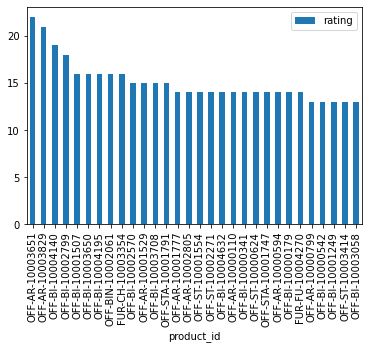

In [31]:
#Plotting the most popular items
most_popular.head(30).plot(kind = "bar")

In [32]:
# Recommendation of similar products based on a product selected by customers
utility_matrix = df.pivot_table(values='rating', index='customer_id', columns='product_id', fill_value=0)
utility_matrix.head()

product_id,FUR-ADV-10000002,FUR-ADV-10000108,FUR-ADV-10000183,FUR-ADV-10000188,FUR-ADV-10000571,FUR-ADV-10000600,FUR-ADV-10000847,FUR-ADV-10001440,FUR-ADV-10001659,FUR-ADV-10001855,...,TEC-STA-10003330,TEC-STA-10003386,TEC-STA-10003447,TEC-STA-10003550,TEC-STA-10003925,TEC-STA-10004181,TEC-STA-10004536,TEC-STA-10004542,TEC-STA-10004834,TEC-STA-10004927
customer_id,,,,,,,,,,,,,,,,,,,,,
AA-10315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA-10375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA-10480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA-10645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA-315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
utility_matrix.shape

(1569, 9364)

In [34]:
X = utility_matrix.T
X.head()

customer_id,AA-10315,AA-10375,AA-10480,AA-10645,AA-315,AA-375,AA-480,AA-645,AB-10015,AB-10060,...,XP-11865,XP-21865,YC-11895,YC-21895,YS-11880,YS-21880,ZC-11910,ZC-21910,ZD-11925,ZD-21925
product_id,,,,,,,,,,,,,,,,,,,,,
FUR-ADV-10000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FUR-ADV-10000108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FUR-ADV-10000183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FUR-ADV-10000188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FUR-ADV-10000571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X.shape

(9364, 1569)

In [36]:
#Singular Value Decomposition
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(9364, 10)

In [37]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

C:\Users\robin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\robin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(9364, 9364)

In [38]:
X.index[543]

'FUR-CH-10000996'

In [39]:
i = X.index[543]

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

543

In [40]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(9364,)

In [41]:
#Generating the recommendation list
Recommend = list(X.index[correlation_product_ID > 0.90])
Recommend.remove(i)
Recommend

['FUR-BO-10001042',
 'FUR-BO-10004467',
 'FUR-CH-10000343',
 'FUR-CH-10001891',
 'OFF-AP-10001882',
 'OFF-AR-10000716',
 'OFF-AR-10001418',
 'OFF-AR-10002144',
 'OFF-AR-10003680',
 'OFF-BI-10002429',
 'OFF-BI-10002907',
 'OFF-EN-10000232',
 'OFF-EN-10001528',
 'OFF-FA-10002782',
 'OFF-FA-10003782',
 'OFF-LA-10002068',
 'OFF-LA-10004594',
 'OFF-PA-10002109',
 'OFF-PA-10003301',
 'OFF-ST-10000918',
 'OFF-ST-10001426',
 'OFF-ST-10001799',
 'OFF-ST-10002900',
 'OFF-SU-10000192',
 'TEC-AC-10003577',
 'TEC-CO-10001919',
 'TEC-CO-10002376',
 'TEC-MA-10004857',
 'TEC-PH-10001457']

#### Recommendation based on product description

In [42]:
#Converting the text in product description into numerical data for analysis
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(df["product_description"])
X1

<30270x121816 sparse matrix of type '<class 'numpy.float64'>'
	with 2040664 stored elements in Compressed Sparse Row format>

In [43]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [44]:
#Top words in each cluster based on product description
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 screws
 nuts
 head
 fastener
 hole
 screw
 used
 proposition
 nbsp
 residents
Cluster 1:
 battery
 cutting
 blade
 volt
 tool
 power
 saw
 speed
 lithium
 ion
Cluster 2:
 door
 doors
 oven
 glass
 shower
 cooking
 panel
 easy
 refrigerator
 steel
Cluster 3:
 faucet
 vanity
 shower
 sink
 bathroom
 water
 finish
 chrome
 design
 drain
Cluster 4:
 paint
 rug
 vary
 colors
 color
 fee
 mn
 ct
 ri
 ca
Cluster 5:
 water
 pipe
 pvc
 air
 pressure
 filter
 fittings
 40
 heater
 valve
Cluster 6:
 use
 ft
 easy
 used
 steel
 home
 designed
 wood
 high
 protection
Cluster 7:
 light
 watt
 bulb
 energy
 led
 lighting
 bulbs
 incandescent
 white
 hours
Cluster 8:
 tile
 indoor
 recommended
 residential
 thinset
 commercial
 frost
 wall
 pieces
 piece
Cluster 9:
 storage
 cabinet
 hardware
 steel
 shelf
 finish
 easy
 post
 wood
 frame


In [45]:
#Predicting clusters based on key search words
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [46]:
show_recommendations("cutting tool")

Cluster 1:
 battery
 cutting
 blade
 volt
 tool
 power
 saw
 speed
 lithium
 ion


In [47]:
show_recommendations("wood")

Cluster 9:
 storage
 cabinet
 hardware
 steel
 shelf
 finish
 easy
 post
 wood
 frame


---